In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [2]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [3]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=1e-3), 
              metrics=['accuracy'])

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2842 - accuracy: 0.9167 - val_loss: 0.1595 - val_accuracy: 0.9508
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1164 - accuracy: 0.9645 - val_loss: 0.1209 - val_accuracy: 0.9644
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0803 - accuracy: 0.9747 - val_loss: 0.1231 - val_accuracy: 0.9622
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.1083 - val_accuracy: 0.9705
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.1053 - val_accuracy: 0.9723
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.1196 - val_accuracy:

In [4]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 731us/step - loss: 0.1616 - accuracy: 0.9743


[0.16159626841545105, 0.9743000268936157]

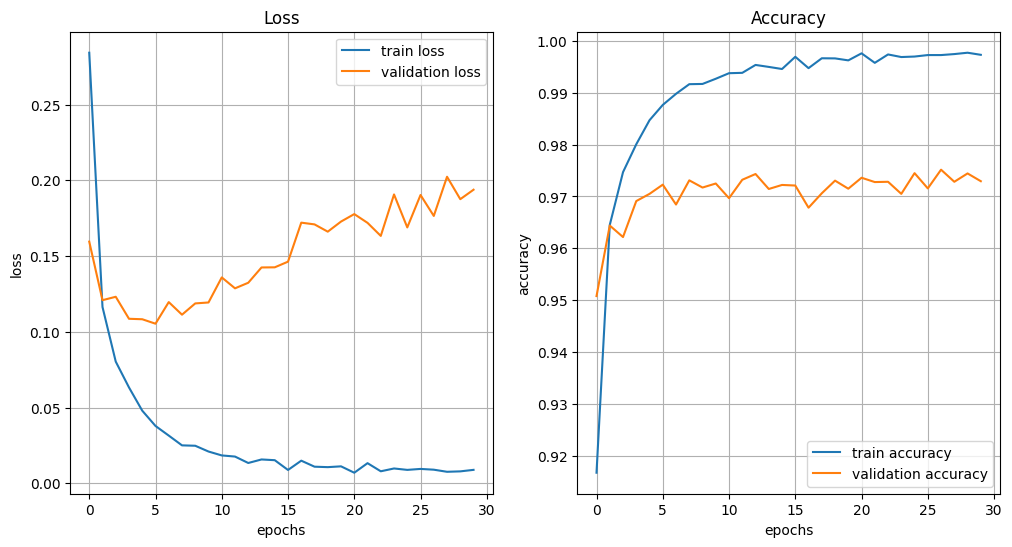

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

313/313 [==============================] - 0s 675us/step


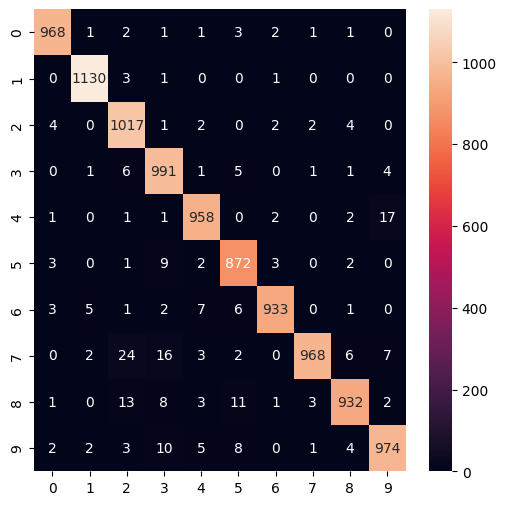

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=1),    # axis=1 == axis=-1
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [10]:
print(cm)

min_accuracy = []

for i in range(10):
    
    accuracy = np.max(cm[i]) / np.sum(cm[i])
    
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), accuracy))
    
    min_accuracy.append(accuracy)


min_accuracy_label = np.argmin(min_accuracy)
    
print(('\n가장 학습률이 떨어진 label: %d\taccuracy = %.3f') % 
      (min_accuracy_label, np.min(min_accuracy)))

[[ 968    1    2    1    1    3    2    1    1    0]
 [   0 1130    3    1    0    0    1    0    0    0]
 [   4    0 1017    1    2    0    2    2    4    0]
 [   0    1    6  991    1    5    0    1    1    4]
 [   1    0    1    1  958    0    2    0    2   17]
 [   3    0    1    9    2  872    3    0    2    0]
 [   3    5    1    2    7    6  933    0    1    0]
 [   0    2   24   16    3    2    0  968    6    7]
 [   1    0   13    8    3   11    1    3  932    2]
 [   2    2    3   10    5    8    0    1    4  974]]
label = 0	(968/980)	accuracy = 0.988
label = 1	(1130/1135)	accuracy = 0.996
label = 2	(1017/1032)	accuracy = 0.985
label = 3	(991/1010)	accuracy = 0.981
label = 4	(958/982)	accuracy = 0.976
label = 5	(872/892)	accuracy = 0.978
label = 6	(933/958)	accuracy = 0.974
label = 7	(968/1028)	accuracy = 0.942
label = 8	(932/974)	accuracy = 0.957
label = 9	(974/1009)	accuracy = 0.965

가장 학습률이 떨어진 label: 7	accuracy = 0.942
